In [112]:
import pandas as pd
import numpy as np
import os, time, random

#### Identify Directories

In [113]:
currDir = os.getcwd()
rootDir = os.path.abspath(os.path.join(currDir,'..'))

dataDir = os.path.abspath(os.path.join(rootDir,'data'))
rawDataDir = os.path.abspath(os.path.join(dataDir,'raw'))
interimDataDir = os.path.abspath(os.path.join(dataDir,'interim'))
finalDataDir = os.path.abspath(os.path.join(dataDir,'final'))

#### Web Scraping Lat/Longitudes (w/ Selenium)

In [114]:
from selenium import webdriver
from bs4 import BeautifulSoup
import urllib

# https://pythonprogramming.net/urllib-tutorial-python-3/
# https://www.linkedin.com/pulse/how-easy-scraping-data-from-linkedin-profiles-david-craven/

In [115]:
'''
driver_path = "/Users/Michael/chromedriver"
driver = webdriver.Chrome(driver_path)

soup.find("input",id="latitude")
soup.find("input",id="longitude")

Australia bounding box: ('Australia', (113.338953078, -43.6345972634, 153.569469029, -10.6681857235))
found here: https://gist.github.com/graydon/11198540

coordinates = [(-33.86,151.2),
               (113.338953078, -43.6345972634),
               (153.569469029, -10.6681857235)
               
              
              ]


'''

'\ndriver_path = "/Users/Michael/chromedriver"\ndriver = webdriver.Chrome(driver_path)\n\nsoup.find("input",id="latitude")\nsoup.find("input",id="longitude")\n\nAustralia bounding box: (\'Australia\', (113.338953078, -43.6345972634, 153.569469029, -10.6681857235))\nfound here: https://gist.github.com/graydon/11198540\n\ncoordinates = [(-33.86,151.2),\n               (113.338953078, -43.6345972634),\n               (153.569469029, -10.6681857235)\n               \n              \n              ]\n\n\n'

In [116]:
t0 = time.time()

# instantiate driver
driver_path = "/Users/Michael/chromedriver"
driver = webdriver.Chrome(driver_path)

# open chrome, go to URL
url = "https://www.latlong.net/Show-Latitude-Longitude.html"
driver.get(url)

# iterate through lat/long values, submit request, save location string result

N = 100

try:
    location_list
except: 
    location_list = []

for num in range(N):
    
    # generate random lats + longs (must be inside Australia bounding box)
    lat = random.randint(-43,-10) + random.randint(0,100)/100
    long = random.randint(113,153) + random.randint(0,100)/100

    # find lat + long input elements
    input_lat = driver.find_element_by_id("latitude")
    input_long = driver.find_element_by_id("longitude")

    # clear input elements
    input_lat.clear()
    input_long.clear()
    
    # input a lat + long pair (must be in string format)
    input_lat.send_keys(str(lat))
    input_long.send_keys(str(long))

    # convert input lat + long to address
    convert = driver.find_element_by_class_name("button")
    convert.click()

    # record request output
    location = driver.find_element_by_class_name("bgw").text
    
    # if no address is found, record 'None'
    if len(location)==0:
        location = "None"
    
    # append lat + long + location to list
    location_list.append((lat,long,location))
    
    if (num+1) % 100 == 0:
        print(num+1)

# close browser
driver.close()

t1 = time.time()

100


In [117]:
len(location_list)

230

In [118]:
mins = (t1-t0)/60

print("No of minutes:",mins)

# approv 38.5 seconds for 10 sets of coordinates
# approx 64 minutes per 1000 sets of coordinates

No of minutes: 4.720694065093994


#### Extracting States from Location Strings

In [119]:
states = ['Western Australia','South Australia','New South Wales',
          'Tasmania','Northern Territory','Queensland','Victoria']

In [120]:

result = []
for lat,long,location in location_list:
    location = location.split('\n')[0]
    for state in states:
        if state.lower() in location.lower():
            res = (lat,long,state)
            break
        else:
            res = (lat,long,'None')

        
    result.append(res)
        
assert(len(location_list)==len(result))


In [121]:
df = pd.DataFrame(result,columns=['Lat','Long','State'])
print(df.shape)

(230, 3)


In [122]:
CSVs = [file for file in os.listdir(rawDataDir) if '.csv' in file]
CSVs.sort()

prev_filename = f"{rawDataDir}/coordinates_and_states_pull{len(CSVs)}.csv"
prev_df = pd.read_csv(prev_filename)

df = pd.concat([prev_df,df]).reset_index(drop=True)

filename = f"{rawDataDir}/coordinates_and_states_pull{len(CSVs)+1}.csv"
df.to_csv(filename,index=False)

print(df.shape)

(6993, 3)


In [123]:
df['State'].value_counts()

None                  3583
Western Australia     1023
Queensland             746
Northern Territory     623
South Australia        559
New South Wales        336
Victoria                87
Tasmania                36
Name: State, dtype: int64

In [124]:
df.head()

,Lat,Long,State
0,-42.65,138.44,None
1,-37.24,125.40,None
2,-32.67,127.16,None
3,-41.03,113.45,None
4,-10.11,125.35,None


#### Plotting Data

In [125]:
import matplotlib.pyplot as plt

In [126]:
bounding_box = [(df['Long'].min(),df['Long'].max()),      
                (df['Lat'].min(), df['Lat'].max())]

In [127]:
'''
colors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}
ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))
'''

"\ncolors = {'D':'red', 'E':'blue', 'F':'green', 'G':'black'}\nax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))\n"

In [128]:
states

['Western Australia',
 'South Australia',
 'New South Wales',
 'Tasmania',
 'Northern Territory',
 'Queensland',
 'Victoria']

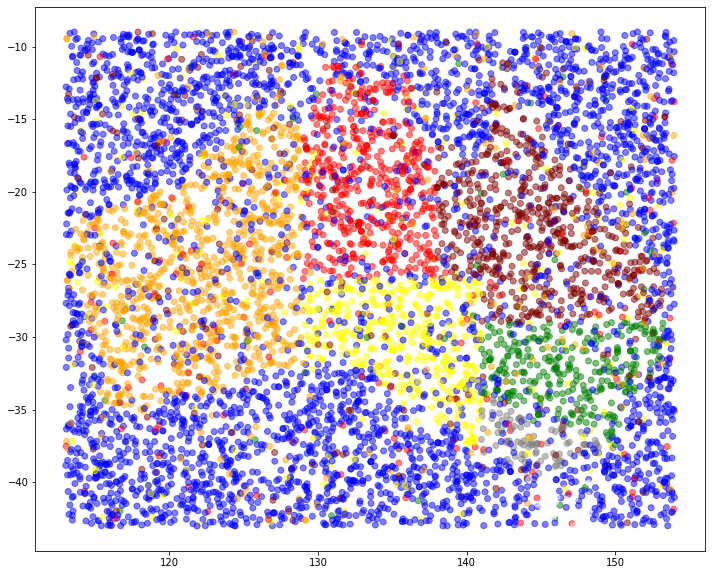

In [129]:
fig, ax = plt.subplots(figsize = (12,10))

color_dict = {'Western Australia':'orange',
              'South Australia':'yellow',
              'New South Wales':'green',
              'Tasmania':'white',
              'Northern Territory':'red',
              'Queensland':'maroon',
              'Victoria':'grey',
              'None':'blue'
}

plt.scatter(df['Long'],df['Lat']
            ,alpha=0.5
            ,c=df['State'].apply(lambda x: color_dict[x]));